# Proyecto Modulo 3


<a href="https://colab.research.google.com/github/ArturoG1z/Proyecto-Modulo-3-CyAD/blob/main/Notebook/proyecto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

***PENDIENTE:*** Agregar descripción pequeña del problema del dataset y del objetivo


In [2]:
import pandas as pd
import cufflinks as cf
from IPython.display import display
cf.set_config_file(sharing='public', theme='pearl', offline=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# ruta = '/content/drive/MyDrive/Colab Notebooks/PROYECTO/data set con color.xlsx'
# ruta = './data set Proyecto.xlsx'
ruta = './SEDUCA-2023B.xlsx'
df_original = pd.read_excel(ruta)

In [3]:
df_original.head()

,Unnamed: 0,carrera,No.,Asesor,Comunidad,Espacio_Académico,Bloque,Grupo,alumnos,1er_P_Ponderación-semanas,...,Porcentaje-Eficiencia-Terminal,Aprobados,correos_enviados,correos_recibidos,Aprobados ordinario,Aprobados extraordinario,Aprobados título,Asesoría académica Respondidas/Recibidas,Histórico de chat personal,Histórico de socializa por comunidad
0,1,Ingeniería en Computación,1,NaN,69142 Inglés 8 / D2,Valle de Chalco,0,O5,35,100\4,...,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0\0,0.0,0.0
1,2,Ingeniería en Computación,2,NaN,69133 Inglés 6 / C2,Valle de Chalco,0,OB,25,60\6,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
2,3,Ingeniería en Computación,3,NaN,69143 Inglés 8 / D2,Valle de Chalco,0,O6,23,60\6,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
3,4,Ingeniería en Computación,4,NaN,69132 Inglés 6 / C2,Valle de Chalco,0,OA,37,100\5,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
4,5,Ingeniería en Computación (2019),1,NaN,68487 Inglés 8 / D2,CU Texcoco,0,D4,50,9\9,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0


In [4]:
df_original.shape

(1773, 39)

## Limpieza de los datos

### Eliminar columnas innecesarias

In [5]:
# remove last 6 columns and first column
df_original = df_original.iloc[:, :-6]
df_original = df_original.iloc[:, 1:]

In [6]:
df_original.dtypes

carrera                                         object
No.                                              int64
Asesor                                         float64
Comunidad                                       object
Espacio_Académico                               object
Bloque                                           int64
Grupo                                           object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                float64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo        float64
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_a

In [7]:
quitar = [
  'Asesor',
  'Bloque',
  'Grupo',
  'Porcentaje-Eficiencia-Terminal',
]

#print(columnas)
df = df_original.drop(quitar, axis=1)

# Eliminando el ID de la materia en la columna 'Comunidad'
df['Comunidad'] = df['Comunidad'].str[5:]
df.head()

,carrera,No.,Comunidad,Espacio_Académico,alumnos,1er_P_Ponderación-semanas,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,...,2p_total_actividades_calificadas,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,Aprobados,correos_enviados,correos_recibidos
0,Ingeniería en Computación,1,Inglés 8 / D2,Valle de Chalco,35,100\4,17,17,1.0,583,...,617.0,617.0,0.998,616.0,97.0,1200.0,0.0,0.0,NaN,1.0
1,Ingeniería en Computación,2,Inglés 6 / C2,Valle de Chalco,25,60\6,18,18,1.0,438,...,452.0,452.0,1.000,452.0,0.0,890.0,0.0,0.0,NaN,NaN
2,Ingeniería en Computación,3,Inglés 8 / D2,Valle de Chalco,23,60\6,19,19,1.0,402,...,380.0,380.0,1.000,380.0,0.0,782.0,0.0,0.0,NaN,NaN
3,Ingeniería en Computación,4,Inglés 6 / C2,Valle de Chalco,37,100\5,24,22,1.0,712,...,555.0,555.0,0.829,460.0,81.0,1267.0,0.0,0.0,NaN,NaN
4,Ingeniería en Computación (2019),1,Inglés 8 / D2,CU Texcoco,50,9\9,19,18,1.0,770,...,765.0,765.0,1.000,765.0,0.0,1535.0,0.0,0.0,NaN,NaN


### Separar columnas compuestas

In [8]:
# Reemplaza los valores NaN por 0
df.fillna(0, inplace=True)

In [9]:
''' 
CONVERT TO INT
1p_total_actividades_entregadas
1p_total_actividades_entregadas
1p_total_actividades_calificadas_tiempo
2p_total_actividades_asignadas
2p_total_actividades_evaluativas
2p_total_actividades_calificadas
2p_total_actividades_entregadas
2p_total_actividades_calificadas_tiempo
2p_porcentaje_aprobados
total_actividades_calificadas
trabajos_por_calificar
Aprobados 
'''
columnas = [
  '1p_total_actividades_entregadas',
  '1p_total_actividades_entregadas',
  '1p_total_actividades_calificadas_tiempo',
  '2p_total_actividades_asignadas',
  '2p_total_actividades_evaluativas',
  '2p_total_actividades_calificadas',
  '2p_total_actividades_entregadas',
  '2p_total_actividades_calificadas_tiempo',
  '2p_porcentaje_aprobados',
  'total_actividades_calificadas',
  'trabajos_por_calificar',
  'Aprobados',
]

for col in columnas:
  df[col] = df[col].astype(int)

In [10]:
df.dtypes

carrera                                         object
No.                                              int64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                  int32
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo          int32
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_actividades_asignadas                   int32
2p_total_actividades_evaluativas                 int32
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

In [11]:
''' 1er_P_Ponderación-semanas
2oP_Ponderación-semanas '''
# if is not like this n/n like '100/2' or is int then convert to 0/0 
df['1er_P_Ponderación-semanas'] = df['1er_P_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)
df['2oP_Ponderación-semanas'] = df['2oP_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)


In [12]:
# Separando la columna 1er_P_Ponderación-semanas en : 1erPonderacion Semana_1erP splited by '\' and convert to int (nP_ponderacion y nP_semana) n es el parcial colocarlas en la misma posicion donde estaba la columna original

df[['1p_Ponderacion', '1p_semana']] = df['1er_P_Ponderación-semanas'].str.split('\\', expand=True)
df['1p_Ponderacion'] = df['1p_Ponderacion'].astype(int)
df['1p_semana'] = df['1p_semana'].astype(int)
df = df.drop('1er_P_Ponderación-semanas', axis=1)

# Separando la columna 2oP_Ponderación-semanas
df[['2p_Ponderacion', '2p_semana']] = df['2oP_Ponderación-semanas'].str.split('\\', expand=True)
df['2p_Ponderacion'] = df['2p_Ponderacion'].astype(int)
df['2p_semana'] = df['2p_semana'].astype(int)
df = df.drop('2oP_Ponderación-semanas', axis=1)



df.tail()
#df.shape

,carrera,No.,Comunidad,Espacio_Académico,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,...,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,Aprobados,correos_enviados,correos_recibidos,1p_Ponderacion,1p_semana,2p_Ponderacion,2p_semana
1768,Licenciado en Trabajo Social,37,Investigación cuantitativa,Ciencias de la Conducta,47,10,7,0.997,285,286,...,0,285,43,0,0.0,1.0,0,0,0,0
1769,Licenciado en Trabajo Social,38,Administracion De Programas Y Proyectos Sociales,Chimalhuacán,45,0,0,0.000,0,0,...,0,0,0,0,0.0,0.0,0,0,0,0
1770,Licenciado en Trabajo Social,39,Trabajo Social Individualizado,Chimalhuacán,41,0,0,0.000,0,0,...,0,0,0,0,0.0,0.0,0,0,0,0
1771,Licenciado en Trabajo Social,40,Derecho,Chimalhuacán,51,0,0,0.000,0,0,...,0,0,0,0,0.0,0.0,0,0,0,0
1772,Licenciado en Trabajo Social,41,Aplicacion Del Conocimiento En Trabajo Social,Chimalhuacán,36,0,0,0.000,0,0,...,0,0,0,0,0.0,0.0,0,0,0,0


In [13]:

# Cuenta cuántos 0 hay en la columna
numero_ceros_1er = df['1p_porcentaje_aprobados'].value_counts()[0]
numero_ceros_2do = df['2p_porcentaje_aprobados'].value_counts()[0]

# Imprime el número de 0
print(numero_ceros_1er)

# Imprime el número de 0
print(numero_ceros_2do)


880
891


### Obtener nuevas columnas calculadas

In [14]:
df.fillna(0, inplace=True)

In [15]:
# get how many 1er P_Actividades asignadas are diferent than 1er P_Actividades evaluativas
# diferent_values = (numerical_df['1p_total_actividades_asignadas'] != numerical_df['1p_total_actividades_evaluativas']).sum()
# print(diferent_values)

# total de actividades asignadas = Alumnos * 1er P_Actividades asignadas 
# porcentaje as float64
df['1p_total_actividades_asignadas'] = df['alumnos'] * df['1p_total_actividades_asignadas']
df['2p_total_actividades_asignadas'] = df['alumnos'] * df['2p_total_actividades_asignadas']
df['total_actividades_asignadas'] = df['1p_total_actividades_asignadas'] + df['2p_total_actividades_asignadas']

In [16]:
# porcentaje de actividades entregadas = 1p_total_actividades_entregadas / 1p_total_actividades_asignadas
df['1p_porcentaje_actividades_entregadas'] = (df['1p_total_actividades_entregadas'] / df['1p_total_actividades_asignadas']) * 100
df['2p_porcentaje_actividades_entregadas'] = (df['2p_total_actividades_entregadas'] / df['2p_total_actividades_asignadas']) * 100
df['porcentaje_actividades_entregadas'] = ((df['1p_total_actividades_entregadas'] + df['2p_total_actividades_entregadas']) / df['total_actividades_asignadas']) * 100

# change nan values to 0
df.fillna(0, inplace=True)

# replace inf values to 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# convert each column to dtype float64
df['1p_porcentaje_actividades_entregadas'] = df['1p_porcentaje_actividades_entregadas'].astype(float)
df['2p_porcentaje_actividades_entregadas'] = df['2p_porcentaje_actividades_entregadas'].astype(float)
df['porcentaje_actividades_entregadas'] = df['porcentaje_actividades_entregadas'].astype(float)

In [17]:
df.head()

,carrera,No.,Comunidad,Espacio_Académico,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,...,correos_enviados,correos_recibidos,1p_Ponderacion,1p_semana,2p_Ponderacion,2p_semana,total_actividades_asignadas,1p_porcentaje_actividades_entregadas,2p_porcentaje_actividades_entregadas,porcentaje_actividades_entregadas
0,Ingeniería en Computación,1,Inglés 8 / D2,Valle de Chalco,35,595,17,1.0,583,583,...,0.0,1.0,0,0,0,0,1260,97.983193,92.781955,95.238095
1,Ingeniería en Computación,2,Inglés 6 / C2,Valle de Chalco,25,450,18,1.0,438,438,...,0.0,0.0,0,0,0,0,925,97.333333,95.157895,96.216216
2,Ingeniería en Computación,3,Inglés 8 / D2,Valle de Chalco,23,437,19,1.0,402,402,...,0.0,0.0,0,0,0,0,897,91.990847,82.608696,87.179487
3,Ingeniería en Computación,4,Inglés 6 / C2,Valle de Chalco,37,888,22,1.0,712,712,...,0.0,0.0,0,0,0,0,1628,80.180180,75.000000,77.825553
4,Ingeniería en Computación (2019),1,Inglés 8 / D2,CU Texcoco,50,950,18,1.0,770,770,...,0.0,0.0,0,0,0,0,2000,81.052632,72.857143,76.750000


In [18]:
# Split df into categorical df and numerical df first 4 columns are categorical and the rest are numerical
categorical_df = df.iloc[:, :4]
numerical_df = df.iloc[:, 4:]

### Filas con valores nulos

In [19]:
# search for nan values in numerical_df
nan_values = numerical_df.isna().sum()
print(nan_values)

alumnos                                        0
1p_total_actividades_asignadas                 0
1p_total_actividades_evaluativas               0
1p_porcentaje_evidencias_calificadas           0
1p_total_actividades_calificadas               0
1p_total_actividades_entregadas                0
1p_porcentaje_evidencias_calificadas_tiempo    0
1p_total_actividades_calificadas_tiempo        0
1p_porcentaje_aprobados                        0
2p_total_actividades_asignadas                 0
2p_total_actividades_evaluativas               0
2p_porcentaje_evidencias_calificadas           0
2p_total_actividades_calificadas               0
2p_total_actividades_entregadas                0
2p_porcentaje_evidencias_calificadas_tiempo    0
2p_total_actividades_calificadas_tiempo        0
2p_porcentaje_aprobados                        0
total_actividades_calificadas                  0
trabajos_por_calificar                         0
Aprobados                                      0
correos_enviados    

## Entrenar modelo


In [20]:
categorical_features = categorical_df.columns
numerical_features = numerical_df.columns

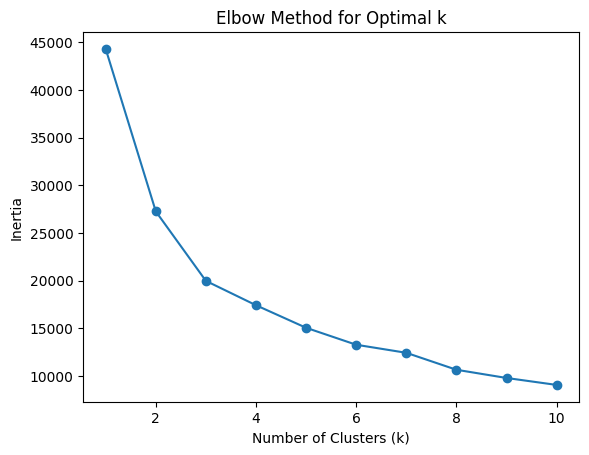

In [42]:
import plotly.express as px

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(numerical_df)

# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents, columns=['pca1', 'pca2', 'pca3'])

# df.head()

# Concatenate the DataFrames
df_final = pd.concat([PCA_components, df], axis=1)



# Create a KMeans instance with 3 clusters: model
inercia = []
for k in range(1, 11):
  model = KMeans(n_clusters=k, n_init=10)
  # dont show output
  model.fit(X_std, y=None)
  inercia.append(model.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init=10)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_std)

# Create a DataFrame with labels and species as columns: df

df_final['cluster'] = 'Cluster ' + pd.Series(labels).astype(str)
df_final.head()

# See cluster with pca

fig = px.scatter_3d(df_final, x='pca1', y='pca2', z='pca3', color='cluster')
# increase the graph size
fig.update_layout(
  title='Clusters',
  scene=dict(
      xaxis=dict(title='PCA 1'),
      yaxis=dict(title='PCA 2'),
      zaxis=dict(title='PCA 3')
  ),
  margin=dict(l=0, r=0, b=0, t=0),
  height=800,
  width=800
)
fig.show()





In [22]:
df_final.dtypes

pca1                                           float64
pca2                                           float64
carrera                                         object
No.                                              int64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                          int64
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                  int32
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo          int32
1p_porcentaje_aprobados                          int64
2p_total_actividades_asignadas                   int64
2p_total_actividades_evaluativas                 int32
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

In [23]:
# now with df original wee have 3 clusters to interpret the data make 3 dataframes with each cluster  (df_final['cluster']) and see the mean of each cluster

df_by_cluster = df_final.groupby('cluster')
df_by_cluster

# wee have 26 columns that are numerical from numerical_df

# get statistics of each cluster
for cluster, data in df_by_cluster:
  print(f'Cluster {cluster}')
  ## see graphics of each cluster
  ''' Con los siguientes datos de un data set sobre rendimiento de grupos de universidad en una plataforma educativa virtual

    alumnos
    total_actividades_asignadas
    porcentaje_actividades_entregadas
    1p_porcentaje_actividades_entregadas
    2p_porcentaje_actividades_entregadas

    1p_total_actividades_calificadas
    1p_porcentaje_evidencias_calificadas_tiempo
    1p_total_actividades_calificadas_tiempo

    2p_total_actividades_calificadas
    2p_porcentaje_evidencias_calificadas_tiempo
    2p_total_actividades_calificadas_tiempo


    1p_porcentaje_aprobados
    2p_porcentaje_aprobados

    correos_enviados
    correos_recibidos

    con los 3 clusters obtenidos que etiquetan a estos datos, como obtener graficos y resultados adecuados para interpretar los clusters con esos datos
  '''


  



Cluster 0
Cluster 1
Cluster 2


## Para interpretar los clusters obtenidos a partir de los datos de rendimiento de grupos universitarios en una plataforma educativa virtual, puedes utilizar las siguientes técnicas:

### 1. Visualización:

- Gráficos de dispersión: Crea gráficos de dispersión para cada par de variables relevantes. Colorea los puntos de acuerdo al cluster al que pertenecen. Busca patrones y relaciones entre las variables que diferencian los clusters.
- Gráficos de radar: Para cada cluster, crea un gráfico de radar que muestre el valor promedio de cada variable para ese cluster. Esto te permitirá visualizar las fortalezas y debilidades de cada cluster en comparación con los demás.
- Análisis de componentes principales (PCA): Reduce la dimensionalidad de los datos y visualiza las relaciones entre las variables y los clusters en un espacio bidimensional.

### 2. Análisis estadístico:

- Pruebas de hipótesis: Compara las medias de las variables entre los clusters para determinar si existen diferencias significativas.
- Análisis de varianza (ANOVA): Investiga si existe una relación significativa entre las variables y los clusters.
- Cálculo de medidas de distancia: Calcula la distancia entre los clusters utilizando diferentes métricas como la distancia euclidiana o la distancia de Mahalanobis.

### 3. Interpretación:

- Identifica las características que definen a cada cluster: Busca las variables que tienen mayor diferencia entre los clusters.
- Nombra los clusters: Asigna un nombre descriptivo a cada cluster basado en sus características.
- Relaciona los clusters con el contexto: Interpreta los resultados en el contexto de la plataforma educativa virtual y del rendimiento de los grupos.

Herramientas:

- Librerías de Python: Puedes utilizar librerías como matplotlib, seaborn, scikit-learn y pandas para realizar los análisis y visualizaciones.
- Software estadístico: Puedes utilizar software como SPSS, R o SAS para realizar análisis estadísticos más complejos.

Ejemplos de resultados:

- Cluster 1: Alumnos con alta participación (porcentaje de actividades entregadas), pero bajo rendimiento (porcentaje de aprobados).
- Cluster 2: Alumnos con baja participación, pero alto rendimiento.
- Cluster 3: Alumnos con participación y rendimiento promedio.

Recomendaciones:

- Elige las técnicas de análisis y visualización más adecuadas para tus datos y objetivos.
- Considera el contexto de los datos al interpretar los resultados.
- Utiliza diferentes técnicas para obtener una visión completa de los clusters.
